# Import Dataset

In [14]:
import kagglehub
import os
import shutil

dest_dir = os.path.join("..", "data", "raw")
final_dest_path = os.path.join(dest_dir, "telco-customer-churn.csv")

if os.path.exists(final_dest_path):
    print(f"File already exists: {final_dest_path}. Skipping download.")
else:
    downloaded_dir_path = kagglehub.dataset_download("blastchar/telco-customer-churn")
    os.makedirs(dest_dir, exist_ok=True)
    temp_dest = os.path.join(dest_dir, "_temp_download")
    if os.path.exists(temp_dest):
        shutil.rmtree(temp_dest)
    moved_dir_path = shutil.move(downloaded_dir_path, temp_dest)
    source_csv_filename = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
    source_csv_path = os.path.join(moved_dir_path, source_csv_filename)
    shutil.move(source_csv_path, final_dest_path)
    shutil.rmtree(moved_dir_path)
    print(f"Dataset saved to: {final_dest_path}")


Dataset saved to: ../data/raw/telco-customer-churn.csv


# Importing required packages for pre-processing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


## EDA

In [15]:
data = pd.read_csv(final_dest_path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
data.shape

(7043, 21)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.duplicated().sum()

np.int64(0)

In [28]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
for col in data.columns:
    print(f"Column: {col}")
    print(data[col].unique())
    print("-" * 40)

Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------
Column: gender
['Female' 'Male']
----------------------------------------
Column: SeniorCitizen
[0 1]
----------------------------------------
Column: Partner
['Yes' 'No']
----------------------------------------
Column: Dependents
['No' 'Yes']
----------------------------------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
----------------------------------------
Column: PhoneService
['No' 'Yes']
----------------------------------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
----------------------------------------
Column: InternetService
['DSL' 'Fiber optic' 'No']
----------------------------------------
Column: OnlineSecurity
['No

In [40]:
cleaned_data = data.drop(columns=["customerID", "gender", "MultipleLines"])

cleaned_data['Partner'] = cleaned_data['Partner'].map({'Yes': 1, 'No': 0})
cleaned_data['Dependents'] = cleaned_data['Dependents'].map({'Yes': 1, 'No': 0})
cleaned_data['PhoneService'] = cleaned_data['PhoneService'].map({'Yes': 1, 'No': 0})
cleaned_data['InternetService'] = cleaned_data['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
cleaned_data['OnlineSecurity'] = cleaned_data['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
cleaned_data['OnlineBackup'] = cleaned_data['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
cleaned_data['DeviceProtection'] = cleaned_data['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
cleaned_data['TechSupport'] = cleaned_data['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
cleaned_data['StreamingTV'] = cleaned_data['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
cleaned_data['StreamingMovies'] = cleaned_data['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
cleaned_data['Contract'] = cleaned_data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
cleaned_data['PaperlessBilling'] = cleaned_data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
cleaned_data['PaymentMethod'] = cleaned_data['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
cleaned_data['TotalCharges'] = pd.to_numeric(cleaned_data['TotalCharges'], errors='coerce')
cleaned_data['TotalCharges'].fillna(0, inplace=True)
cleaned_data['Churn'] = cleaned_data['Churn'].map({'Yes': 1, 'No': 0})

cleaned_data.head()

/tmp/ipykernel_21805/3023287870.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_data['TotalCharges'].fillna(0, inplace=True)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,0,0,0,34,1,1,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,2,1,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,45,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,2,1,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1


# Visualizations

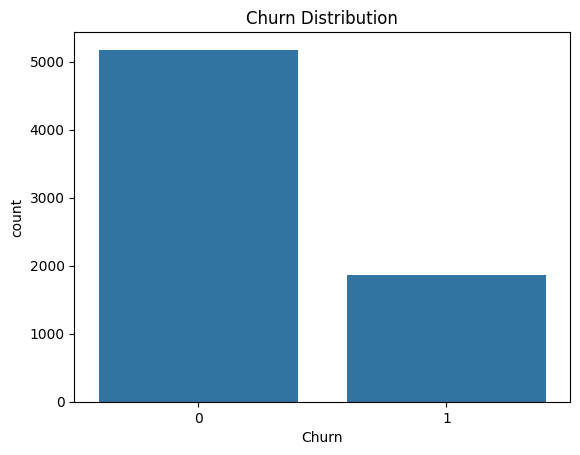

In [ ]:
sns.countplot(x='Churn', data=cleaned_data)
plt.title('Churn Distribution')
plt.show()


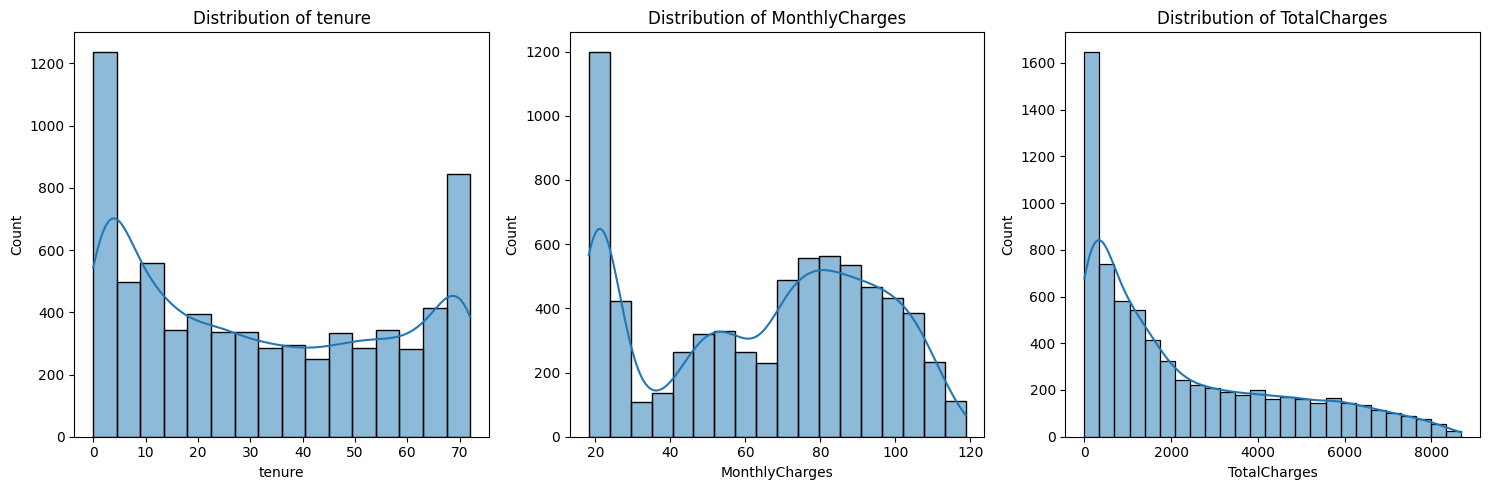

In [51]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(15, 5))

for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(1, 3, i)
    sns.histplot(cleaned_data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

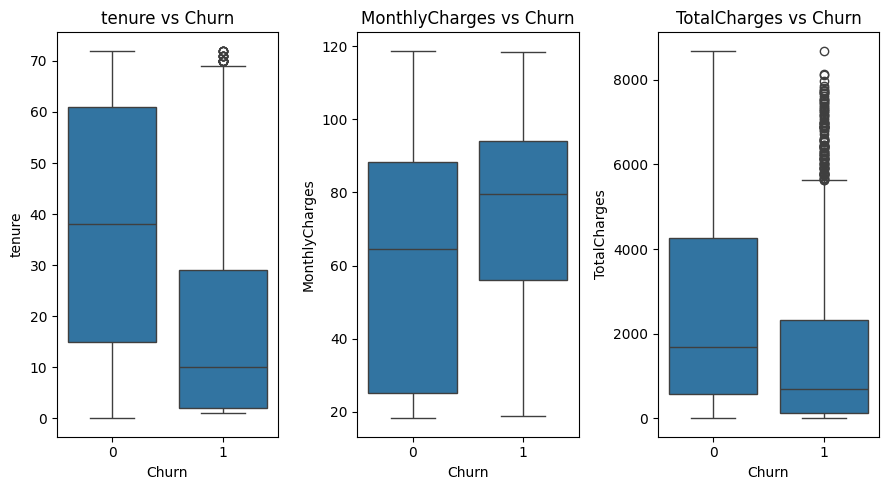

In [53]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(1, 5, i)
    sns.boxplot(x='Churn', y=col, data=cleaned_data)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

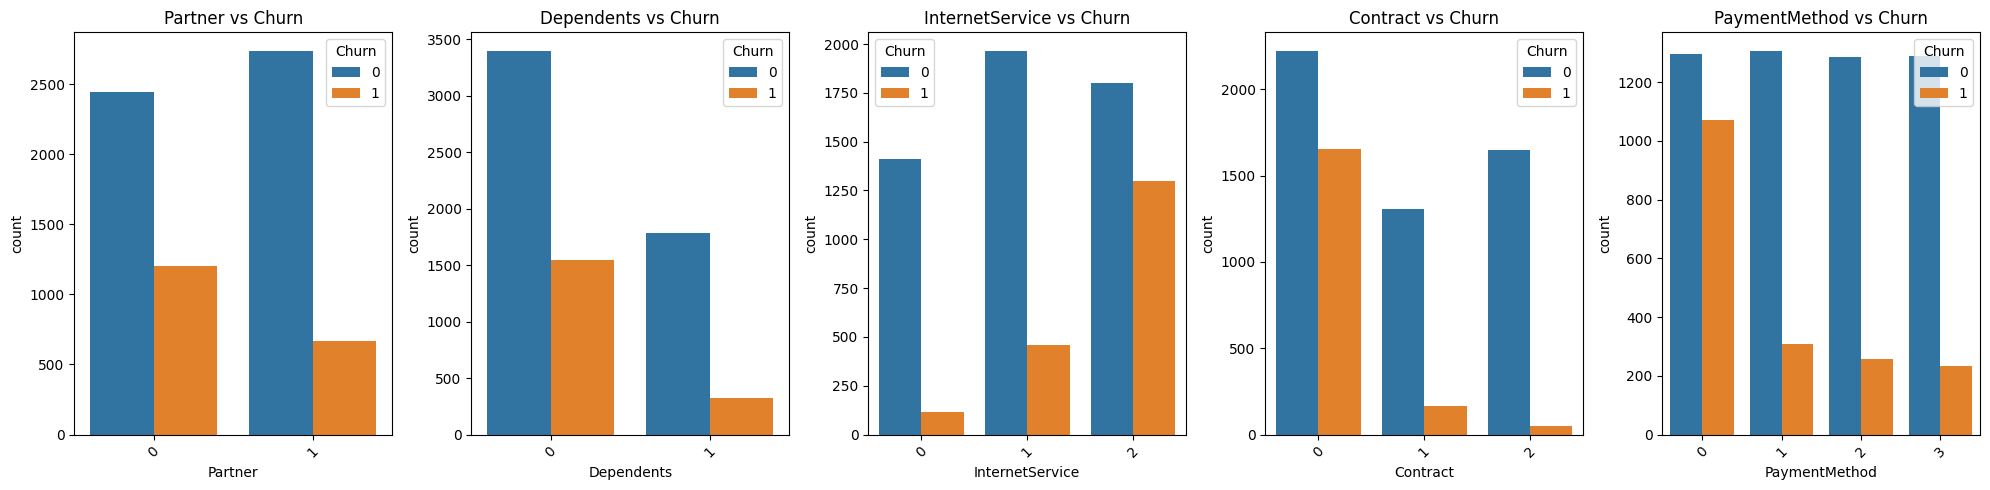

In [56]:
categorical_cols = ['Partner', 'Dependents', 'InternetService', 'Contract', 'PaymentMethod']
plt.figure(figsize=(20, 5))
for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(1, 5, i)
    sns.countplot(x=col, hue='Churn', data=cleaned_data)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Export the cleaned data

In [57]:
cleaned_data.to_csv(os.path.join("..", "data", "processed", "cleaned_telco_customer_churn.csv"), index=False)